In [1]:
import tensorflow as tf
import keras
# import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.models import Model
import datetime
from google.colab import drive
import os
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## install_library
!pip install git+https://github.com/divamgupta/image-segmentation-keras


In [ ]:
## Download_Dataset
! wget https://github.com/divamgupta/datasets/releases/download/seg/dataset1.zip && unzip dataset1.zip

## Section1: UNet

In [8]:
from keras_segmentation.models.unet import unet

model = unet(n_classes=50)


In [9]:
model.train(
    train_images =  "dataset1/images_prepped_train/",
    train_annotations = "dataset1/annotations_prepped_train/",
    checkpoints_path = "/tmp/vgg_unet_1" , epochs=5  
)

Verifying training dataset


100%|██████████| 367/367 [00:02<00:00, 153.80it/s]
/usr/local/lib/python3.7/dist-packages/keras_segmentation/train.py:157: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  epochs=epochs, callbacks=callbacks)


Dataset verified! 
Epoch 1/5
512/512 [==============================] - 165s 308ms/step - loss: 2.3663 - accuracy: 0.5224
Epoch 2/5
512/512 [==============================] - 158s 308ms/step - loss: 1.5471 - accuracy: 0.6866
Epoch 3/5
512/512 [==============================] - 158s 308ms/step - loss: 1.2999 - accuracy: 0.7249
Epoch 4/5
512/512 [==============================] - 158s 308ms/step - loss: 1.1647 - accuracy: 0.7441
Epoch 5/5
512/512 [==============================] - 158s 309ms/step - loss: 1.0720 - accuracy: 0.7575


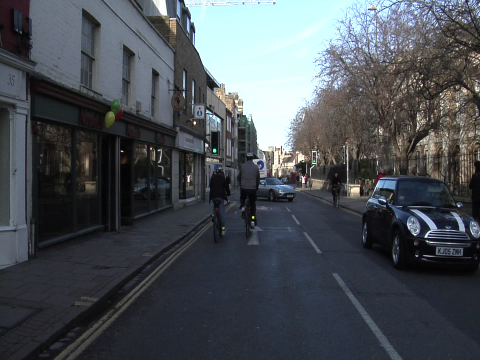

In [28]:
## RAW Picture
from IPython.display import Image
Image("dataset1/images_prepped_test/0016E5_07965.png")

In [17]:
out = model.predict_segmentation(inp="dataset1/images_prepped_test/0016E5_07965.png",
    out_fname="output1.png" , overlay_img=True, show_legends=True,
    class_names = [ "Sky",    "Building", "Pole","Road","Pavement","Tree","SignSymbol", "Fence", "Car","Pedestrian", "Bicyclist"])

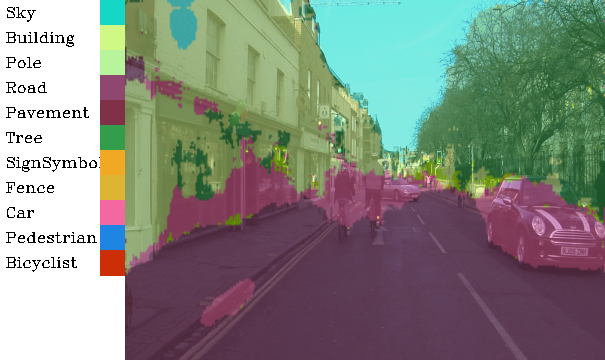

In [15]:
## Segmented_image
from IPython.display import Image
Image('output1.png')

##Section2: PSPNet


In [20]:
from keras_segmentation.models.pspnet import pspnet

model = pspnet(n_classes=50)

In [21]:
model.train(
    train_images =  "dataset1/images_prepped_train/",
    train_annotations = "dataset1/annotations_prepped_train/",
    checkpoints_path = "/tmp/vgg_unet_1" , epochs=5  
)

Verifying training dataset


100%|██████████| 367/367 [00:02<00:00, 155.22it/s]
/usr/local/lib/python3.7/dist-packages/keras_segmentation/train.py:157: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  epochs=epochs, callbacks=callbacks)


Dataset verified! 
Epoch 1/5
512/512 [==============================] - 77s 145ms/step - loss: 2.7225 - accuracy: 0.4121
Epoch 2/5
512/512 [==============================] - 74s 144ms/step - loss: 1.3079 - accuracy: 0.6779
Epoch 3/5
512/512 [==============================] - 74s 144ms/step - loss: 1.0064 - accuracy: 0.7204
Epoch 4/5
512/512 [==============================] - 74s 144ms/step - loss: 0.8875 - accuracy: 0.7415
Epoch 5/5
512/512 [==============================] - 74s 144ms/step - loss: 0.8202 - accuracy: 0.7571


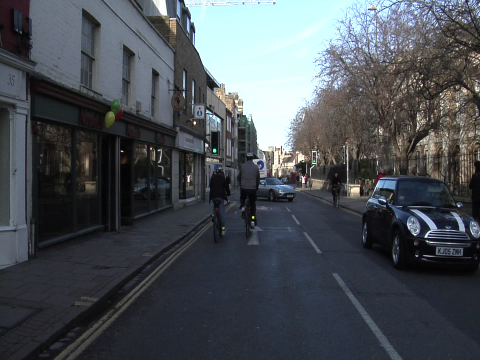

In [27]:
## RAW Picture
from IPython.display import Image
Image("dataset1/images_prepped_test/0016E5_07965.png")

In [22]:

out = model.predict_segmentation(
    inp="dataset1/images_prepped_test/0016E5_07967.png",
    out_fname="output2.png" , overlay_img=True, show_legends=True,
    class_names = [ "Sky",    "Building", "Pole","Road","Pavement","Tree","SignSymbol", "Fence", "Car","Pedestrian", "Bicyclist"]

)

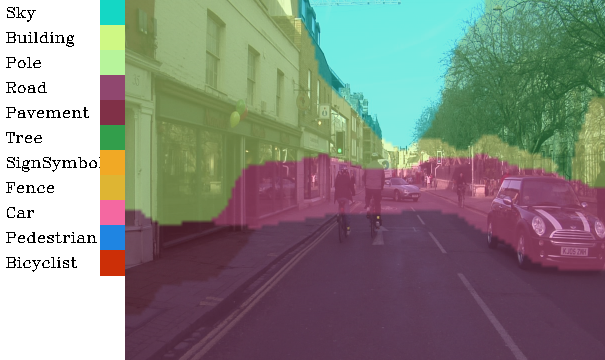

In [23]:
## Segmented_image
from IPython.display import Image
Image('output2.png')